In [1]:
import statistics 
import numpy
import math
import numpy as np
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [84]:
F = [309800,216900,107700,17760,6226,1233,569.4,347.7,102.8]

In [85]:
R1=(1000+10/10)

In [86]:
R2=98.6+10/10

In [87]:
R3=10.7+10/10

In [88]:
V_out1=[70.8/1000,62/1000,45.2/1000]
V_out2=[16.8/1000,14.4/1000]
V_out3=[.792,88/1000,76/1000,72/1000]
V_in1=[7.4,7.4,7.4]
V_in2=[2.72,4.4]
V_in3=[2.02,.168,.124,.1]
A1=[]
A2=[]
A3=[]
A4=[]

In [89]:
for i in range(len(V_out1)):
    A=(R1*V_out1[i])/(V_in1[i])
    A1.append(A)
    A4.append(A)
for i in range(len(V_out2)):
    B=(R2*V_out2[i])/(V_in2[i])
    A2.append(B)
    A4.append(B)
for i in range(len(V_out3)):
    C=(R3*V_out3[i])/(V_in3[i])
    A3.append(C)
    A4.append(C)
    

In [90]:
A1

[9.577135135135135, 8.386756756756757, 6.114216216216216]

In [91]:
A2

[0.6151764705882353, 0.32596363636363634]

In [92]:
A3

[4.587326732673267, 6.128571428571427, 7.170967741935483, 8.424]

In [93]:
A4

[9.577135135135135,
 8.386756756756757,
 6.114216216216216,
 0.6151764705882353,
 0.32596363636363634,
 4.587326732673267,
 6.128571428571427,
 7.170967741935483,
 8.424]

In [126]:
F

[309800, 216900, 107700, 17760, 6226, 1233, 569.4, 347.7, 102.8]

In [138]:
Freq=[309800, 216900, 107700, 17760, 6226]

In [144]:
Freq.reverse()

In [140]:
Freq

[6226, 17760, 107700, 216900, 309800]

In [141]:
Gain=[9.577135135135135,
 8.386756756756757,
 6.114216216216216,
 0.6151764705882353,
 0.32596363636363634]

In [145]:
Gain.reverse()

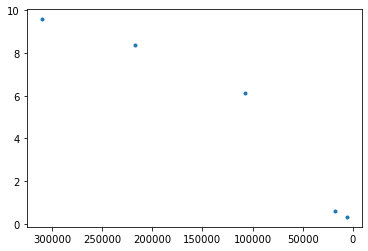

In [151]:
plt.plot(Freq,Gain,'.')
# grab a reference to the current axes
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()


In [149]:
Freq

[309800, 216900, 107700, 17760, 6226]

In [164]:
V1=[5,4.09,3.072,2.044,1.034,-1.035,-2.086,-3.023,-4.09,-5.14]
V2=[-226.2,-135.2,-34,1.8,1.5,102.1,206.0,299.5,405.0,509.0]

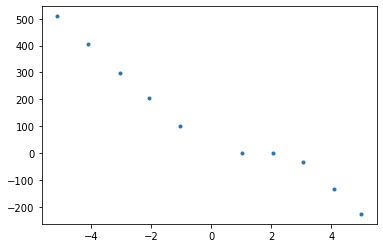

In [165]:
plt.plot(V1,V2,'.')

In [166]:
V1

[5, 4.09, 3.072, 2.044, 1.034, -1.035, -2.086, -3.023, -4.09, -5.14]

In [167]:
V2

[-226.2, -135.2, -34, 1.8, 1.5, 102.1, 206.0, 299.5, 405.0, 509.0]